Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [120]:
NAME = "63070224"
STUDENT_ID = "Tunlaton Wongchai"

---

# 1 Least Squares

**The dataset can be downloaded at https://bit.ly/2RZ15t2**

In [121]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Load a dataset from `ex1_x.csv` as $x$ and `ex1_z.csv` as $z$

In [122]:
x = np.genfromtxt('dataset/ex1_x.csv', delimiter=',').reshape(-1, 1)
z = np.genfromtxt('dataset/ex1_z.csv', delimiter=',').reshape(-1, 1)

In [123]:
assert x.shape in [(10, 1), (10,)]
assert z.shape in [(10, 1), (10,)]

## 1.2 Concatenate a bias vector with $x$ as a new matrix $X$

In [124]:
bias = np.ones((x.shape[0], 1))
X = np.hstack((bias, x))
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [125]:
assert X.shape == (10, 2)

## 1.3 Find the Least-squares solution by using the following equation.

$$
\hat{\theta} = (X^TX)^{-1}X^Tz
$$

In [126]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), z)
theta

array([[ 3.48606   ],
       [-1.17832036]])

## 1.4 Plot the Least-squares estimation of the function.

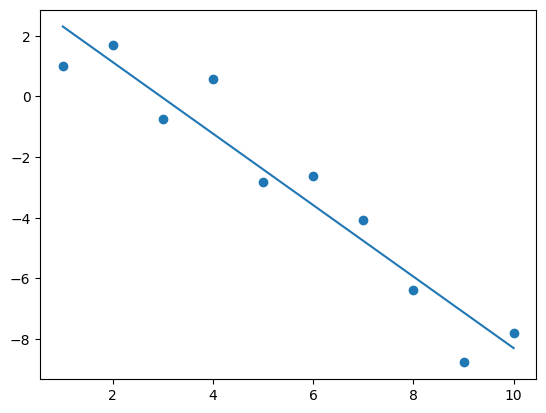

In [127]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta))

## 1.5 Plot the true function with $\theta = [3.75, -1.15]^T$

In [128]:
true_theta = np.array([
    [3.75],
    [-1.15]
])

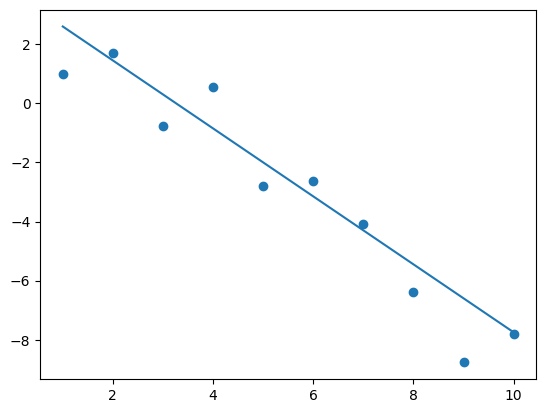

In [129]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, true_theta))

## 1.6 Plot the measured data.

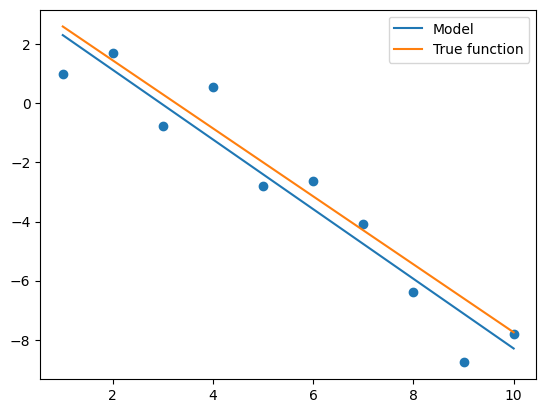

In [130]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta), label="Model")
plt.plot(x, np.dot(X, true_theta), label="True function")
plt.legend()

## 1.7 Observe and discuss the results in Question 4-6

`เมื่อทำการ plot line ด้วยค่า theta จากวิธีการ least-squares กับค่า theata จาก true function พบว่ามี line ทั้งสองเส้นต่างกัน เนื่องจาก error ที่เกิดขึ้นจาก noise`

## 1.8 Find the Least-squares solution by using pseudo-inverse

In [131]:
theta = np.dot(np.linalg.pinv(X), z)
theta

array([[ 3.48606   ],
       [-1.17832036]])

## 1.9 Plot the Least-squares estimation of the function calculated by pseudo-inverse.

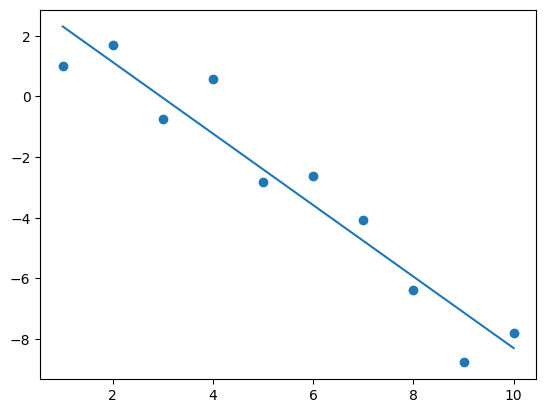

In [132]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta))

## 1.10 Discuss on what you observe

`เมื่อใช้วิธี pseudo-inverse กับใช้สมการก่อนหน้านี้ ก็ให้ผลลัพธ์แบบเดียวกัน`

# 2 Least-Squares - Multivariate Linear Regression

After the first lab session, I believe that you all get to know the Boston Housing Dataset. Thus, I do not need to give you any explaination about the data. The dataset can be downloaded at https://bit.ly/2NBaO7e.

## 2.1 Import dataset from `regression-datasets-housing.csv`

In [133]:
# YOUR CODE HERE
data = np.genfromtxt('dataset/regression-datasets-housing.csv', delimiter=',')
X = data[:, 0:13]
y = data[:, 13].reshape(506, 1)

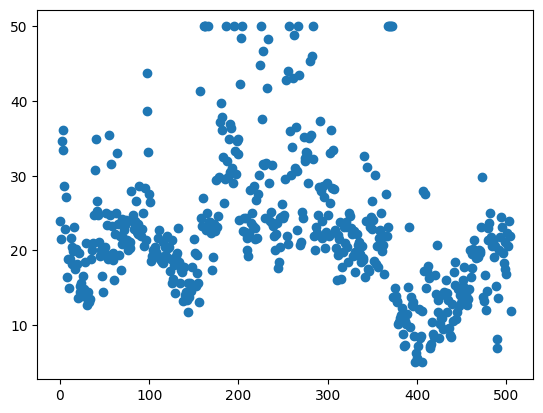

In [134]:
assert X.shape in [(506, 13)]
assert y.shape in [(506, 1)]

plt.scatter(np.arange(X.shape[0]), y);

## 2.2 Find theta by using Gradient Descent Algorithm

In [135]:
# normalization
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
y_norm = (y - y.mean(axis=0)) / y.std(axis=0)

X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)) # add a 1 vector column to X for dot product with theta

In [136]:
def computeCostFunction(X, y, theta):
    y_pred = np.dot(X, theta)
    error = y_pred - y
    cost = 1/(2*X.shape[0]) * np.sum(np.square(error))
    return cost

def gradientDescent(X, y, theta, alpha, n_iteration):
    theta_history = []
    j_history = []
    m, n = X.shape

    for i in range(n_iteration):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        loss = computeCostFunction(X, y, theta)

        weight_gradient = X.T.dot(error) * (1/m)
        theta = theta - alpha * weight_gradient
        print(f"iteration: {i+1} , loss: {loss}")

        theta_history.append(theta)
        j_history.append(loss)

    return theta_history, j_history

In [137]:
theta = np.zeros((X_norm.shape[1],1))
alpha = 0.1
n_iter = 1000

grad_theta, grad_loss = gradientDescent(X_norm, y_norm, theta, alpha, n_iter)

iteration: 1 , loss: 0.49999999999999983
iteration: 2 , loss: 0.3035821215795995
iteration: 3 , loss: 0.25102768982388235
iteration: 4 , loss: 0.22513073183678767
iteration: 5 , loss: 0.20721613184911153
iteration: 6 , loss: 0.19357299884395807
iteration: 7 , loss: 0.18293911871226207
iteration: 8 , loss: 0.17458413306364395
iteration: 9 , loss: 0.16798404672336686
iteration: 10 , loss: 0.16274243180117354
iteration: 11 , loss: 0.15855569700955316
iteration: 12 , loss: 0.15519045602621953
iteration: 13 , loss: 0.15246688641263387
iteration: 14 , loss: 0.15024615273751044
iteration: 15 , loss: 0.14842083952600962
iteration: 16 , loss: 0.14690765708767764
iteration: 17 , loss: 0.1456418718863564
iteration: 18 , loss: 0.14457304778774807
iteration: 19 , loss: 0.14366178501901375
iteration: 20 , loss: 0.14287721940589215
iteration: 21 , loss: 0.14219510167078822
iteration: 22 , loss: 0.14159631985926915
iteration: 23 , loss: 0.14106576073777508
iteration: 24 , loss: 0.1405914308470351
iter

In [138]:
grad_theta[-1] # optimal theta

array([[ 2.53201061e-15],
       [-1.01067821e-01],
       [ 1.27445076e-01],
       [ 1.94233940e-02],
       [ 7.16668383e-02],
       [-2.16127951e-01],
       [ 2.95158782e-01],
       [ 3.20960385e-03],
       [-3.38073466e-01],
       [ 2.96742450e-01],
       [-2.35420127e-01],
       [-2.19459466e-01],
       [ 9.36078008e-02],
       [-4.06454839e-01]])

## 2.3 Find theta by using Least-Squares

In [139]:
ls_theta = np.dot(np.linalg.pinv(X_norm), y_norm)
ls_theta

array([[ 2.47241463e-15],
       [-1.01098719e-01],
       [ 1.27497462e-01],
       [ 1.95927842e-02],
       [ 7.16421715e-02],
       [-2.16160654e-01],
       [ 2.95127746e-01],
       [ 3.23653936e-03],
       [-3.38060141e-01],
       [ 2.97168123e-01],
       [-2.35899758e-01],
       [-2.19481123e-01],
       [ 9.36111081e-02],
       [-4.06470641e-01]])

In [140]:
assert ls_theta.shape == (14, 1)

## 2.4 Compare an error between Gradient Descent Algorithm and Least-Squares.

What do you observe?

In [141]:
grad_error = computeCostFunction(X_norm, y_norm, grad_theta[-1])
ls_error = computeCostFunction(X_norm, y_norm, ls_theta)
print(f'Gradient Descent error : {grad_error}')
print(f'Least Square error : {ls_error}')

Gradient Descent error : 0.13024663127146202
Least Square error : 0.13024661709935328


YOUR ANSWER HERE

`ทั้งสองวิธีให้ค่า loss และ theta ด้วยค่าเดียวกัน`

## 2.5 Can these two algorithms obtain the optimal solutions?

`ทั้งสองวิธีก็ทำให้ได้ผลลัพธ์ที่ดีที่สุด แต่วิธี least-squares มี time complexity ที่ดีกว่าวิธีแบบ gradient descent`

## 2.6 Plot the importance of all the features.

Which features is the most importance features in this dataset?

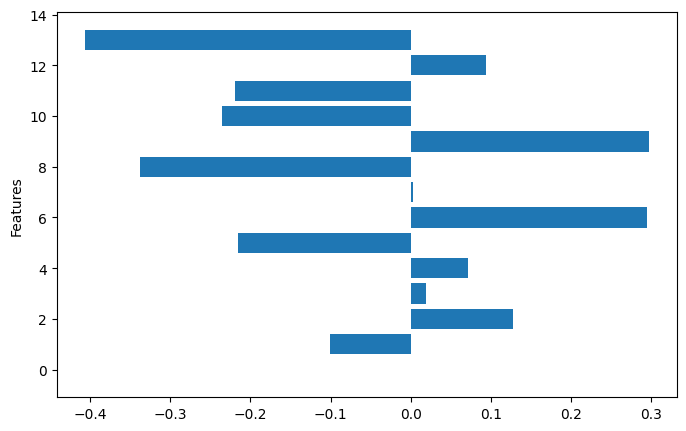

In [142]:
plt.figure(figsize=(8,5))
plt.barh(list(range(14)), ls_theta.flatten())
plt.ylabel("Features")
plt.show()

`feature ที่ 13 เป็น feature ที่สำคัญที่สุด`

# 3. Least-Squares - Non-linear Data

## 3.1 Import dataset from `ex2_x.csv` as $x$ and `ex2_z.csv` as $Z$.

It is noted that $z$ in generated by sine function with Gaussian random noise (S.D.=0.2).

In [143]:
x = np.genfromtxt('dataset/ex2_x.csv', delimiter=',')
z = np.genfromtxt('dataset/ex2_z.csv', delimiter=',')

In [144]:
x = np.expand_dims(x, axis=0).T
z = np.expand_dims(z, axis=0).T

In [145]:
x.shape

(101, 1)

## 3.2 Plot the data distribution

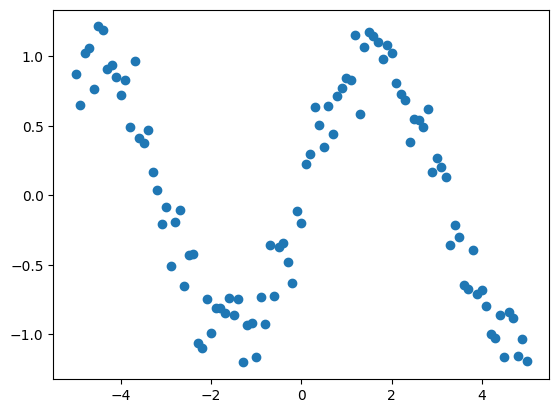

In [146]:
plt.scatter(x, z)

## 3.3 Obtain the least-squares solution of $x$ and $z$ and overlay the obtain function on the data distribution you plot in the previous question.

Discuss on the results you get.

In [147]:
X = np.hstack((np.ones((x.shape[0], 1)), x))
ls_theta = np.dot(np.linalg.pinv(X), z)

In [148]:
ls_theta

array([[ 0.00713729],
       [-0.06496448]])

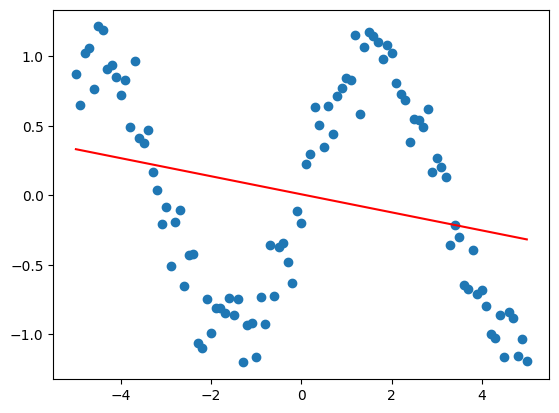

In [149]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, ls_theta), color='r')

`เมื่อใช้ degree 1 หรือแบบ linear ตัว model แทบจะไม่ fit กับข้อมูล`

## 3.4 Find a series of models by increasing the polynomial degree

In [150]:
def show_series_polynomial(degree, X, z):
    X_lin = np.linspace(X.min()-0.5, X.max()+0.5, 1000).reshape(-1, 1)
    poly_lin = np.ones((X_lin.shape[0], 1))

    # bias
    poly_x = np.ones((X.shape[0], 1))

    for i in range(1, degree+1):
        poly_lin = np.hstack((poly_lin, X_lin**i))
        poly_x = np.hstack((poly_x, X**i))

        theta = np.dot(np.linalg.pinv(poly_x), z)
        y = np.dot(poly_lin, theta)

        print("Polynomial %d degree(s) :" %(i))
        for j in range(len(theta)):
            weight = theta[j,0]
            print(f"theta_{j} : {weight}")

        print("-"*20)

show_series_polynomial(10, x, z)

Polynomial 1 degree(s) :
theta_0 : 0.007137287128712884
theta_1 : -0.06496447501456028
--------------------
Polynomial 2 degree(s) :
theta_0 : 0.0164896006221982
theta_1 : -0.06496447501456029
theta_2 : -0.001100272175704149
--------------------
Polynomial 3 degree(s) :
theta_0 : 0.016489600622198022
theta_1 : 0.40991104579536486
theta_2 : -0.0011002721757041366
theta_3 : -0.031041673474305465
--------------------
Polynomial 4 degree(s) :
theta_0 : -0.01972188833389445
theta_1 : 0.4099110457953645
theta_2 : 0.013106813827499614
theta_3 : -0.031041673474305448
theta_4 : -0.0006502098857301536
--------------------
Polynomial 5 degree(s) :
theta_0 : -0.019721888333905743
theta_1 : 0.8723914622632778
theta_2 : 0.013106813827500032
theta_3 : -0.11573953173531508
theta_4 : -0.000650209885730144
theta_5 : 0.0029910956419426484
--------------------
Polynomial 6 degree(s) :
theta_0 : -0.006740401355723448
theta_1 : 0.87239146226327
theta_2 : 0.002403575887508713
theta_3 : -0.11573953173531484
t

## 3.5 Plot the result of each polynomial degree

In [151]:
def polynomial(degree, X, z):
    theta_list = []
    X_lin = np.linspace(X.min()-0.5, X.max()+0.5, 1000).reshape(-1, 1)
    poly_lin = np.ones((X_lin.shape[0], 1))

    # bias
    poly_x = np.ones((X.shape[0], 1))


    for i in range(1, degree+1):
        poly_lin = np.hstack((poly_lin, X_lin**i))
        poly_x = np.hstack((poly_x, X**i))

        theta = np.dot(np.linalg.pinv(poly_x), z)
        y = np.dot(poly_lin, theta)
        plt.figure(figsize=(4,2))
        plt.title("Polynomial %d degree(s)" %(i))
        plt.scatter(X, z)
        plt.plot(X_lin, y, color='r')
        plt.ylim(z.min(), z.max())
        plt.xlabel("$x$")
        plt.ylabel("$z$")
        plt.show()

        theta_list.append(theta)

    return theta_list

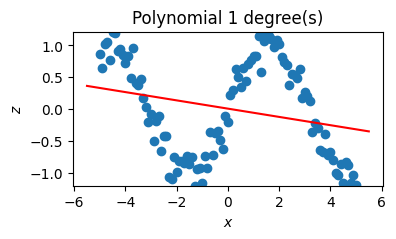

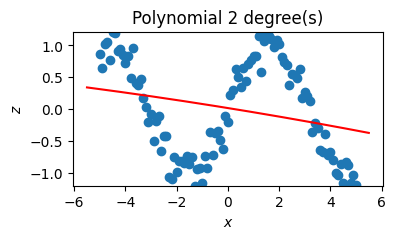

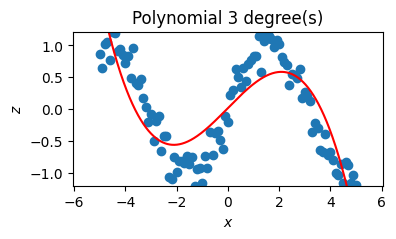

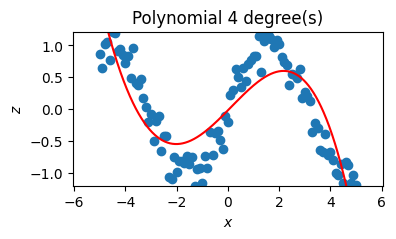

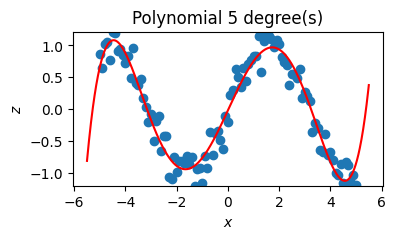

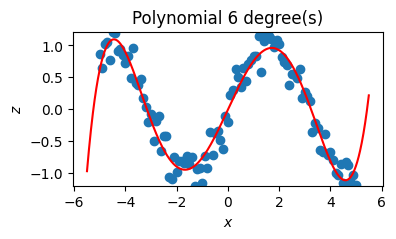

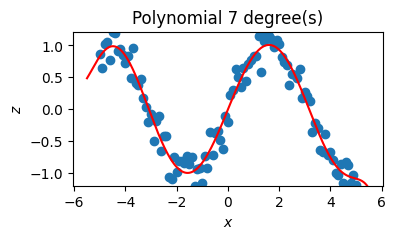

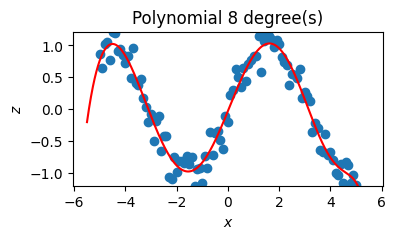

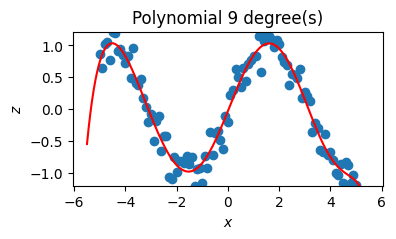

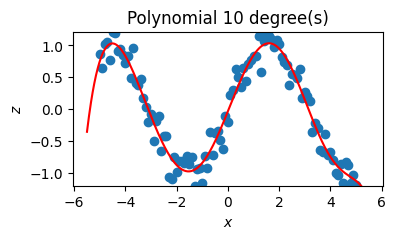

In [152]:
theta_list = polynomial(10, x, z)

## 3.6 Discuss the experimental results

`เมื่อเพิ่ม degrees จะเห็นว่าเส้น smooth ขึ้น ซึ่งคือ model fit กับข้อมูลได้ดีขึ้น`

## 3.7 Plot the importance of all the polynomial degree.

Which degree(s) is/are the most importance feature? What is the appropiate number of degree?

In [153]:
def predicted(X, thetas):
    y_pred = 0
    for i, theta in enumerate(thetas):
        y_pred += theta * (X ** i)
    return y_pred

def meanSqureError(y_pred, y_true):
    mse = np.mean((y_pred - y_true) ** 2)
    return mse

In [154]:
# show mse of each polynomial degree
for idx ,thetas in enumerate(theta_list):
    y_pred = predicted(x, thetas)
    mse = meanSqureError(y_pred, z)
    print("Polynomial %d degree(s)" %(idx+1))
    print(f"MSE: {mse}")
    print("-"*20)

Polynomial 1 degree(s)
MSE: 0.5402007211357284
--------------------
Polynomial 2 degree(s)
MSE: 0.5401307691017646
--------------------
Polynomial 3 degree(s)
MSE: 0.1753228751767186
--------------------
Polynomial 4 degree(s)
MSE: 0.1742878245651801
--------------------
Polynomial 5 degree(s)
MSE: 0.033573933939965515
--------------------
Polynomial 6 degree(s)
MSE: 0.03344146634881721
--------------------
Polynomial 7 degree(s)
MSE: 0.02871560634866831
--------------------
Polynomial 8 degree(s)
MSE: 0.02825907034670728
--------------------
Polynomial 9 degree(s)
MSE: 0.02821016021190006
--------------------
Polynomial 10 degree(s)
MSE: 0.02820364597243675
--------------------


`จะเห็นได้ว่าเมื่อเพิ่ม degree ค่า MSE จะลดลงซึ่งคือ model fit กับข้อมูลได้ดีขึ้นและที่ degree 7 เป็นต้นไป เป็น degree ที่เหมาะสมที่ทำให้ Model fit กับข้อมูลได้ดี(ดูจากการ plot ข้อ 3.5)`

## 3.8 What happens if you drop the terms corresponding to the weights of smallest magnitude?

## 3.9 What happens if you drop those terms and then re-compute the model?